In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [ ]:
#titanic dataset 
df = pd.read_csv("train.csv")   
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


If you want to know more about your data set, (the number of rows, for example), I suggest using Pandas profiling.

It is a powerful tool that provides an analysis of your data frame. You won’t have to run lines of code, again and again, to check for missing values or variable type.

In [3]:
#!pip install ydata_profiling 

In [4]:
#import ydata_profiling as pp

In [5]:
#pp.ProfileReport(df)

In [6]:
#pip install pandas_profiling 

In [7]:
#import pandas_profiling as pp
#pp.ProfileReport(df)

## The Data Question

Before starting any kind of data analysis or visualization, you must have a data question in mind.

What kind of insights are you trying to draw from the data? Any specific trends or patterns?

Write down a few questions you would like to answer with the help of a visualization.

In this case, these are the following data questions we want to be able to answer by the end of the tutorial:

1- How many people survived the Titanic?

2- Which gender was more likely to survive on the Titanic?

3- Did the class the passenger was in have any impact on their survival?

4- Were younger people more likely to survive the Titanic?

5- Were passengers who paid higher fares more likely to survive the Titanic?

Now that we have an idea of what to look for, we can start the data visualization.

## Variable Types

The two main types of variables you will encounter when working with data are categorical and quantitative variables.

Categorical: Categorical variables, as the name suggests, is one that has two or more categories. It represents types of data that can be divided into groups.

For example: In the Titanic data set, the variable ‘Sex’ is categorical. It represents two categories of people; male and female.

Quantitative: Quantitative, or numerical variables represent a measurable quantity.

For example: The variable ‘Age’ is a quantitative variable.

There are different ways to visualize quantitative and qualitative variables, which will be discussed as we go along.
### Visualizing Categorical Variables

We will start by visualizing a single variable first, by using a ‘count plot’ in Seaborn.

A count plot is a simple way to visualize categorical variables. As the name suggests, it displays the frequency of a variable.

### Visualizing how many people survived the Titanic:

In [8]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

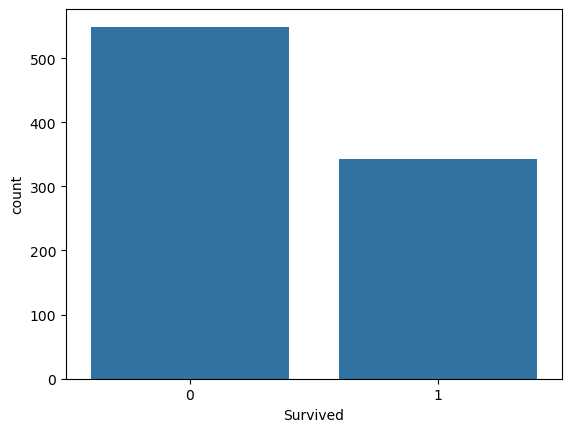

In [9]:
sns.countplot(x='Survived',data=df)

From this count plot, it can be seen that there were a lot more people who didn’t survive the Titanic than ones who did.

Using a count plot, we can now visualize the other categorical variables in the data frame:

 ##   Gender:

<Axes: xlabel='Sex', ylabel='count'>

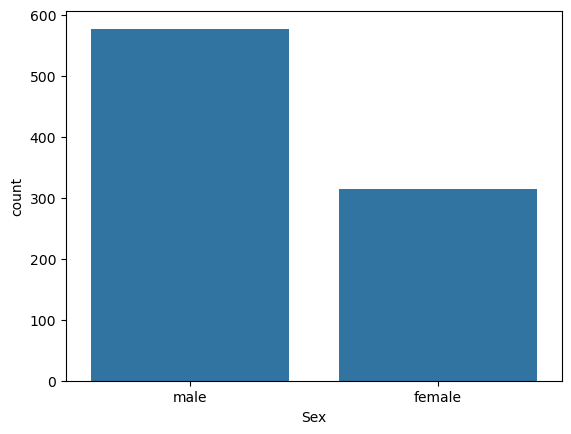

In [10]:
sns.countplot(x='Sex',data=df)

There appears to have been a lot more male than female passengers on the Titanic.

 ##   Pclass:

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

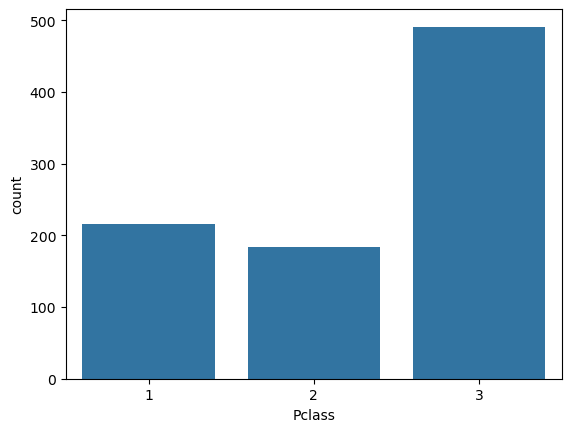

In [11]:
# Pclass:
print(df['Pclass'].value_counts())
sns.countplot(x='Pclass',data=df)

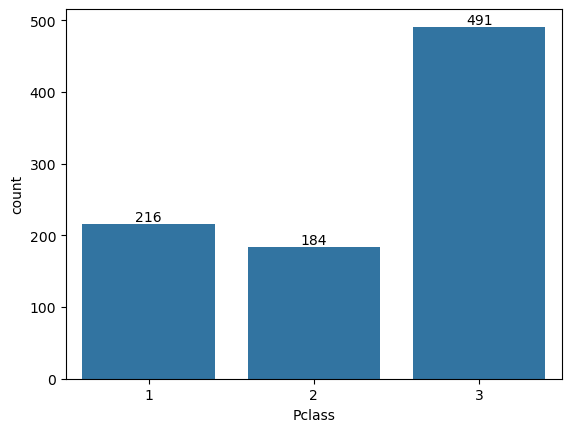

In [12]:
ax=sns.countplot(x='Pclass',data=df)
for i in ax.containers: ax.bar_label(i, fmt='%.f')

The count plot shows us that there were a lot more passengers in the third class than any other class on the Titanic.

 ##    Embarked:

<Axes: xlabel='Embarked', ylabel='count'>

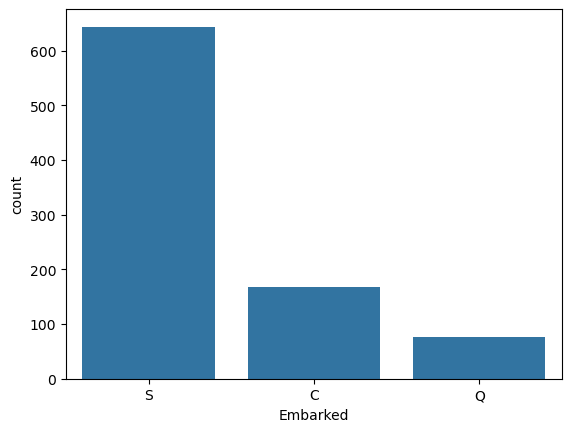

In [13]:
sns.countplot(x='Embarked',data=df)

Most passengers in the Titanic embarked from port S.

### Visualizing Quantitative Variables

To visualize the distribution of a quantitative variable, we can use a histogram.

A histogram is an equivalent of a count plot, but is used for numeric data.

First, we will create a histogram to visualize the age distribution of passengers in the Titanic:

C:\Users\DELL\AppData\Local\Temp\ipykernel_14512\1052970539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=True)


<Axes: xlabel='Age', ylabel='Density'>

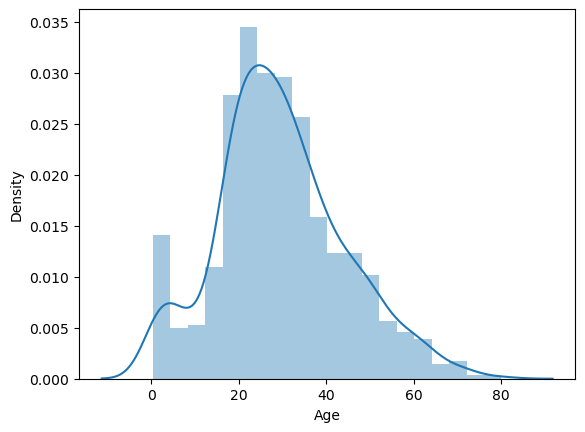

In [14]:
sns.distplot(df['Age'], kde=True)

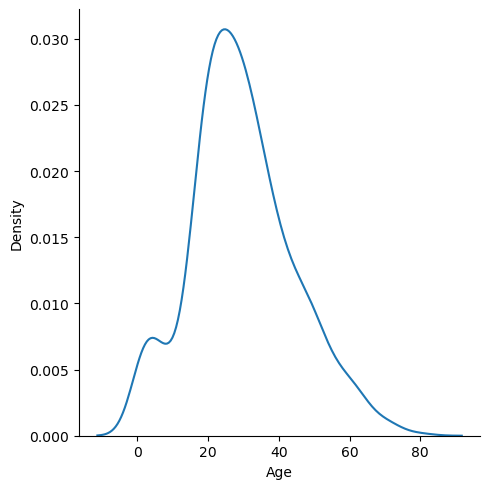

In [15]:
sns.displot(df['Age'], kind="kde")

From the histogram above, it can be observed that most passengers in the Titanic were in the 20–40 age group.

Next, we will take a look at the variable ‘Fare’:

<Axes: xlabel='Fare', ylabel='Count'>

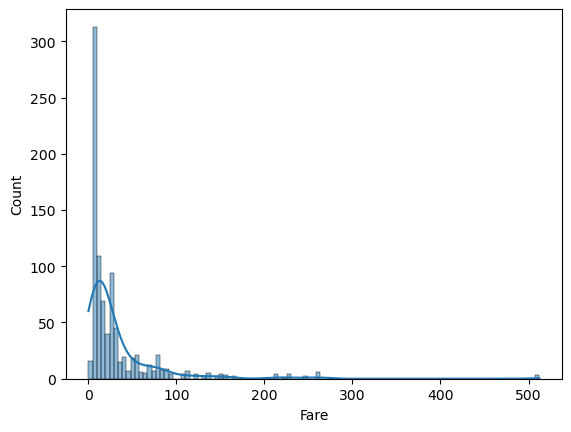

In [16]:
sns.histplot(df['Fare'] , kde=True)

<Axes: xlabel='Fare'>

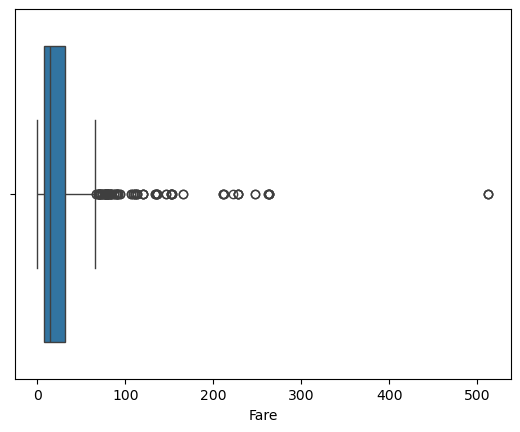

In [17]:
sns.boxplot(df['Fare'], orient='h')

In [18]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Pclass', ylabel='count'>

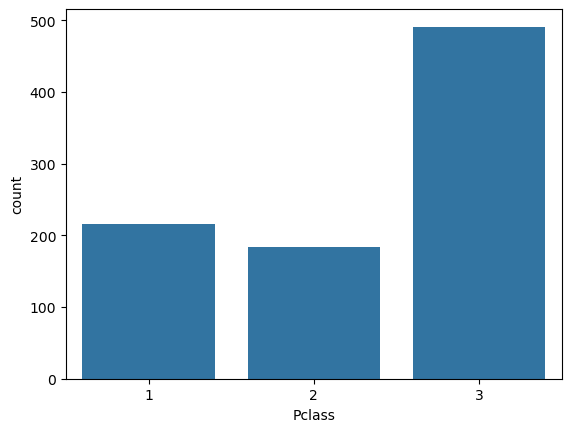

In [19]:
sns.countplot(x = 'Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='Count'>

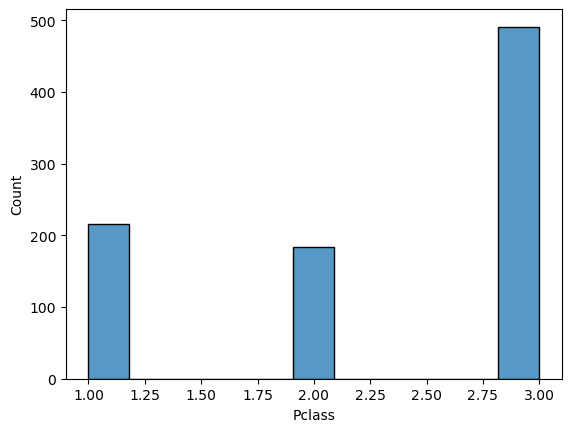

In [20]:
sns.histplot(df['Pclass'])

<Axes: xlabel='Survived', ylabel='Count'>

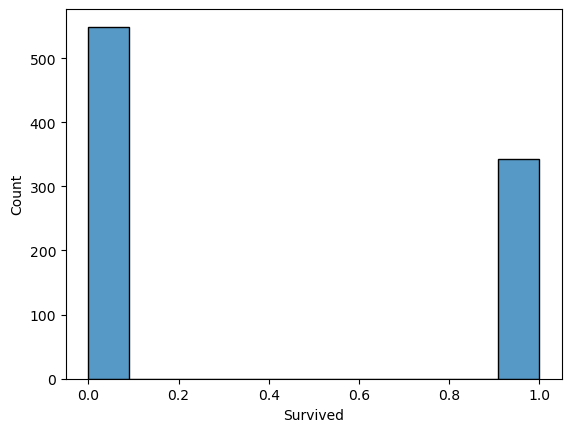

In [21]:
sns.histplot(df['Survived'])

It can be observed that most passengers paid a fare of around 0–50. There are some outliers — a few prices that go up to 500.

It would make sense for passengers of a lower ‘Pclass’, such as class 3, to pay lower fare prices than passengers of a higher class.

We can easily visualize this relationship.

### Visualizing Multiple Variables

When performing data analysis, we often want to find the relationship between two variables.

For example, when answering the question ‘Which gender was more likely to survive the Titanic?’

We need to visualize two variables here — ‘Sex’ and ‘Survived.’

A simple way to do this is to create a count plot, and add a hue function. The hue parameter allows you to choose a variable to visualize with color encoding.

It is a great way to visualize categorical variables.

Here is an example:

In [22]:
#!pip install --upgrade python 

In [23]:
print(sns.__version__)

0.13.2


<Axes: xlabel='Survived', ylabel='percent'>

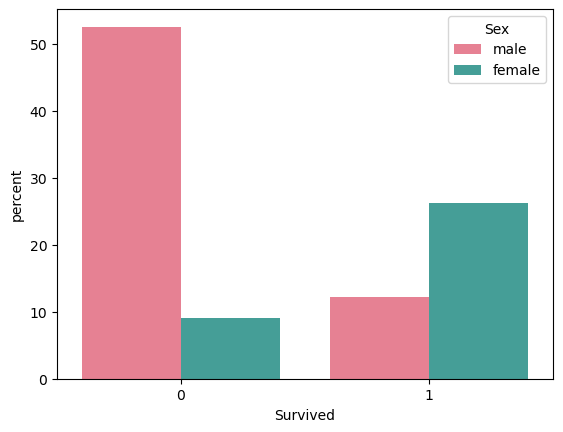

In [24]:
# Visualize survived with sex:
sns.countplot(x='Survived',hue='Sex',data=df, palette='husl', stat='percent')

From this plot, we can see clearly that there were a higher number of female survivors on the Titanic than male.

Similarly, we can answer the following question — Did the class the passenger was in have any impact on their survival?

From the plots above, we can see that passengers in the third class were far less likely to survive than passengers in the first and second class.

We can now visualize the variable ‘Embarked’ with ‘Survived.’

<Axes: xlabel='Survived', ylabel='count'>

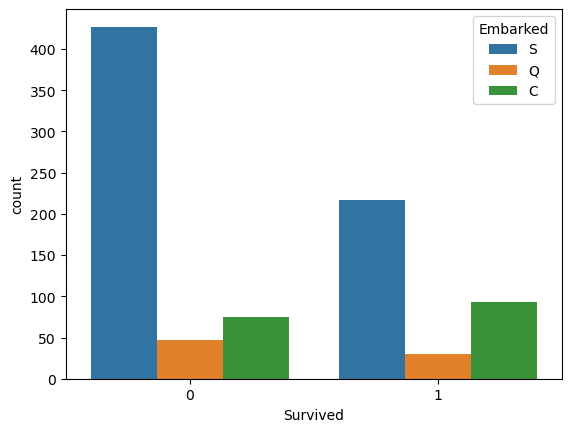

In [25]:
# Survived and embarked:
sns.countplot(x='Survived',hue='Embarked',data=df)

<Axes: xlabel='Embarked', ylabel='count'>

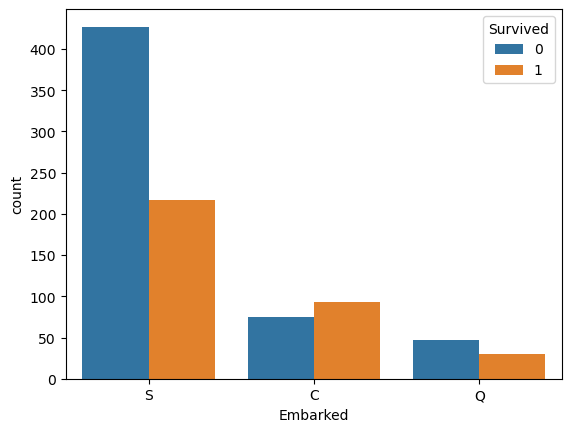

In [26]:
sns.countplot(x='Embarked',hue='Survived',data=df)

Next, we will take a look at how to visualize a quantitative variable with a categorical variable.

‘Were younger people more likely to survive the Titanic?’

To answer this question, we need to visualize the variables ‘Survived’ and ‘Age.’ We can use a simple box plot to do this.

A box plot gives us a good indication on the spread of values, and provides information on the 5 number summary (minimum, first quartile, median, third quartile, maximum).

To fully understand box plots, you can read this article.

https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review

https://doc.arcgis.com/en/insights/latest/create/box-plot.htm

<Axes: xlabel='Age'>

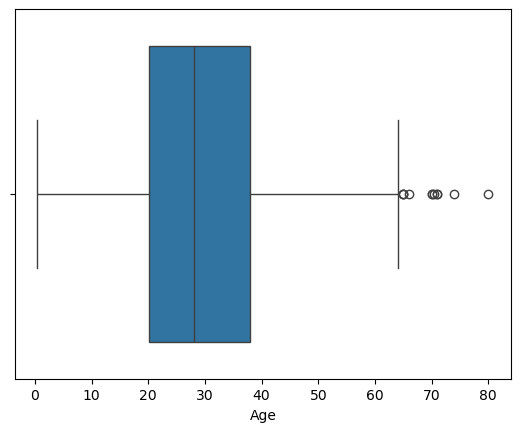

In [27]:
# Age and sex with survived
sns.boxplot(data=df, x='Age')

<Axes: xlabel='Survived', ylabel='Age'>

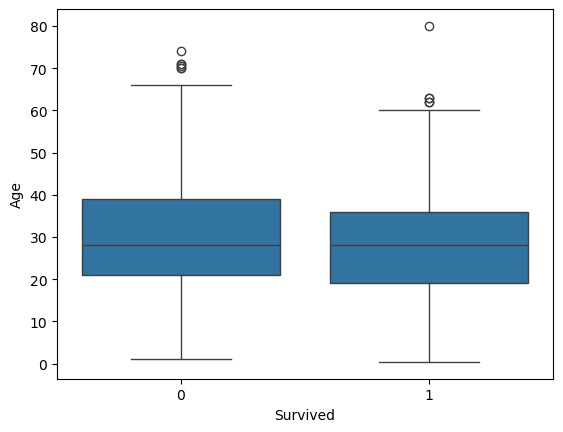

In [28]:
# Age and sex with survived
sns.boxplot(data=df, x='Survived', y='Age')

From the plot above, there seems to be no clear correlation between survival and the age of a person on the Titanic.

Were passengers who paid higher fares more likely to survive the Titanic?

To answer this question, we need to visualize the variables ‘Survived’ and ‘Fare.’

We can create a bar plot to do so:

<Axes: xlabel='Survived', ylabel='Fare'>

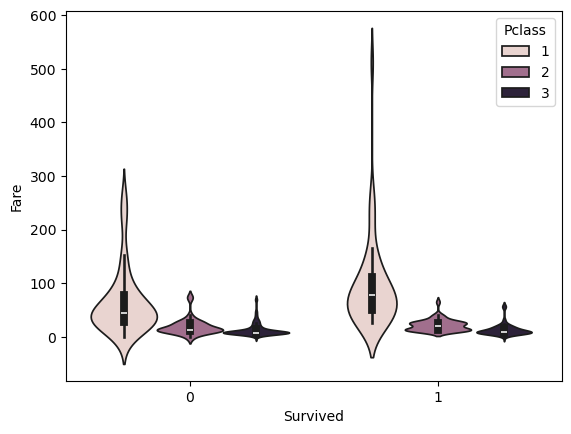

In [29]:
sns.violinplot(data=df, x='Survived', y='Fare', hue = 'Pclass')

<Axes: xlabel='Survived', ylabel='Fare'>

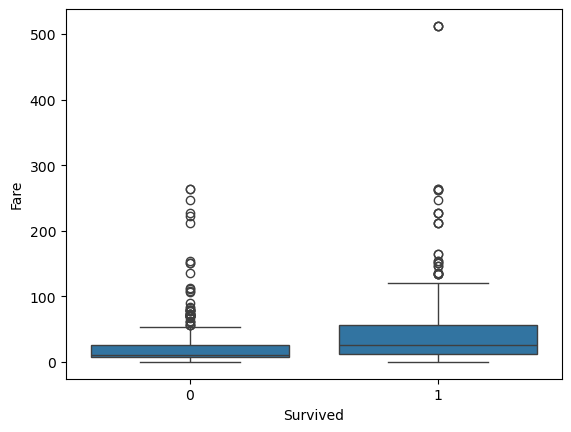

In [30]:
sns.boxplot(data=df, x='Survived', y='Fare')

<Axes: xlabel='Survived', ylabel='Age'>

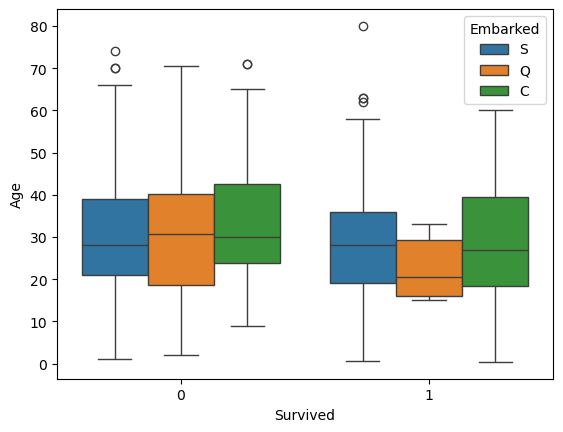

In [31]:
sns.boxplot(data=df, x='Survived', y='Age', hue = 'Embarked')

In [45]:
numeric = df.iloc[: , [0,1,5,6,7,9]]
numeric1 = pd.DataFrame(df.select_dtypes('number').columns)
numeric1

,0
0,PassengerId
1,Survived
2,Pclass
3,Age
4,SibSp
5,Parch
6,Fare
7,Family Size


In [33]:
numeric.corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.077221,-0.035322,0.081629,0.257307
Age,0.036847,-0.077221,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.096067,0.159651,0.216225,1.000000


In [34]:
#Feature Engineering

df['Family Size'] = df["SibSp"] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [35]:
numeric = df.loc[:, ["PassengerId",	"Survived",	"Age",	"SibSp"	,"Parch",	"Fare", "Family Size"]]
numeric.corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Family Size
PassengerId,1.000000,-0.005007,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.077221,-0.035322,0.081629,0.257307,0.016639
Age,0.036847,-0.077221,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,0.096067,0.159651,0.216225,1.000000,0.217138
Family Size,-0.040143,0.016639,-0.301914,0.890712,0.783111,0.217138,1.000000


<Axes: xlabel='Survived', ylabel='Family Size'>

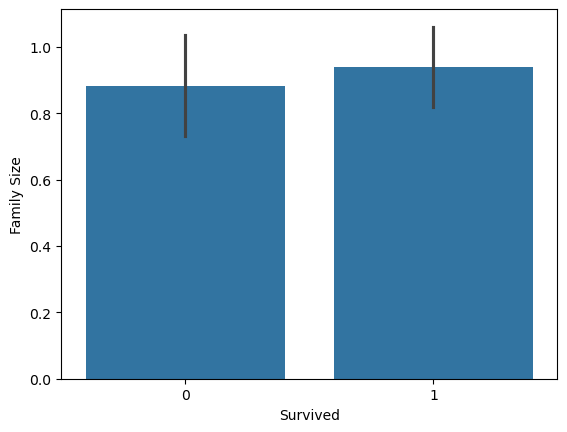

In [36]:
sns.barplot(x='Survived',y="Family Size",data=df)

It can be observed that passengers who paid higher fares were much more likely to survive than passengers who did not.

This may be due to the passenger class they were in. Passengers in higher classes would be more likely to pay higher fares than the passengers in a lower class.

We can visualize this relationship:

<Axes: xlabel='Pclass', ylabel='Fare'>

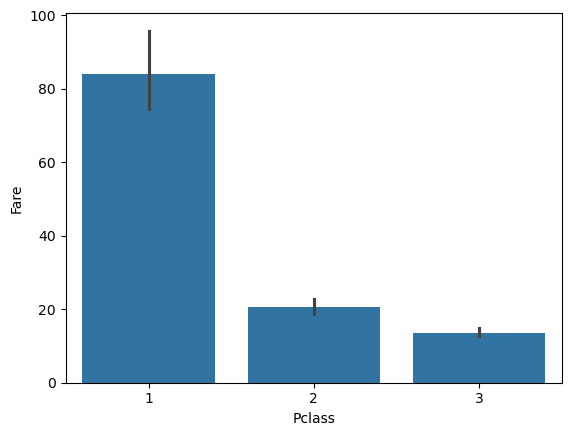

In [37]:
sns.barplot(x='Pclass',y='Fare',data=df)

It looks like our assumption was right!

Passengers in higher classes did pay more for tickets than passengers in lower classes.

Sometimes, we want to visualize more than two variables with each other. For instance, we want to see if a specific age group of males or females were more likely to survive the Titanic.

We need to visualize three variables — ‘Age’, ‘Sex’, and ‘Survived.’ Two of these variables are categorical, and one is quantitative.

You can do this by creating a box plot of the variables ‘Age’ and ‘Sex,’ and create a hue ‘Survived.’

<Axes: xlabel='Age', ylabel='Sex'>

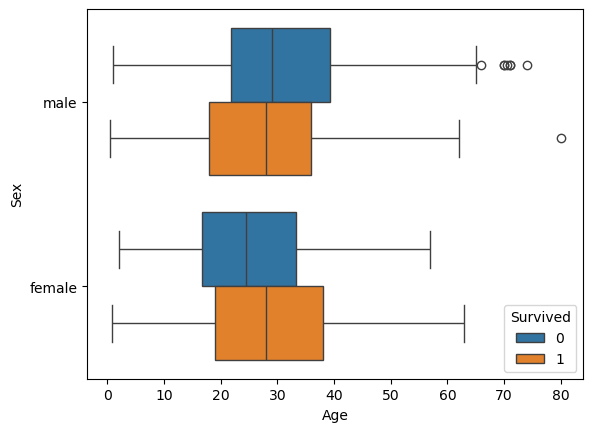

In [38]:
# Age and sex with survived:
sns.boxplot(data=df, x='Age', y='Sex', hue ='Survived')

We can do the same thing with ‘Age’, ‘Pclass’, and ‘Survived’ to see the age distribution of the passengers who survived the Titanic.

<Axes: xlabel='Age', ylabel='Sex'>

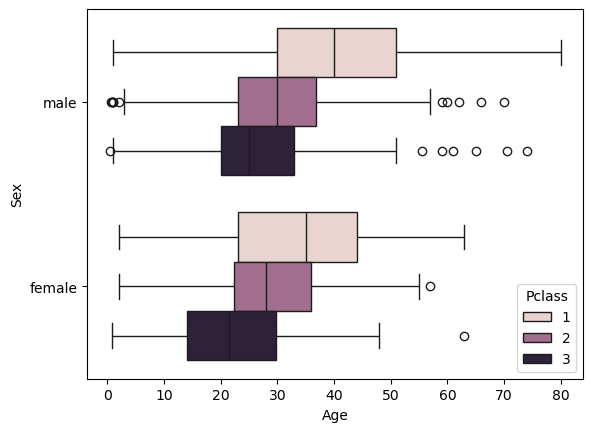

In [39]:
sns.boxplot(data=df, x='Age', y='Sex', hue ='Pclass')

Most first and second class passengers are older, which makes sense because they would have more money to spend to travel in higher classes.

Finally, to see the relationship between the passenger class, fare paid, and survival, we can run the following code:

<Axes: xlabel='Pclass', ylabel='Fare'>

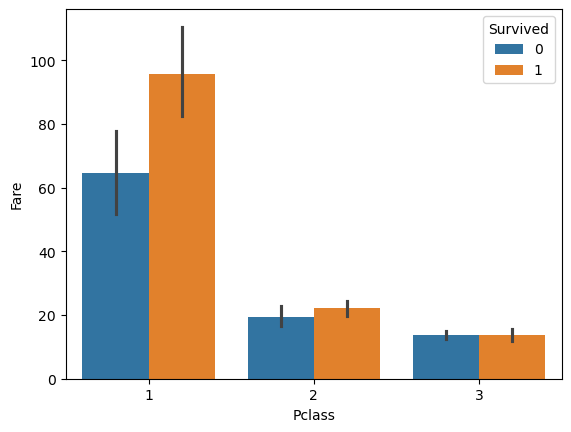

In [40]:
sns.barplot(data=df, x='Pclass', y='Fare', hue ='Survived')

From the visualization above, we can observe two things:

    Passengers of a higher class pay a much higher fare than passengers who don’t.
    Passengers of a higher class are more likely to survive the Titanic.

Visualizing the relationship between more than two variables at the same time is very powerful because it helps us find patterns and answer multiple data questions at the same time.

It is also very simple to create such a visualization using the tools provided in Seaborn.
## Pair plot

Pair plots are a type of visualization that plot the pairwise distribution of multiple variables in one plot.

Pair plots in Seaborn only take in numeric columns, so you will need to select those to pass into your dataset.

In this pair plot, we will visualize every numeric variable alongside each other, and choose to color it with the variable ‘Survived’:

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [48]:
numeric1 = df.iloc[: , [0,1,5,9,12]]
numeric1

,PassengerId,Survived,Age,Fare,Family Size
0,1,0,22.0,7.2500,1
1,2,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,4,1,35.0,53.1000,1
4,5,0,35.0,8.0500,0
...,...,...,...,...,...
886,887,0,27.0,13.0000,0
887,888,1,19.0,30.0000,0
888,889,0,NaN,23.4500,3
889,890,1,26.0,30.0000,0


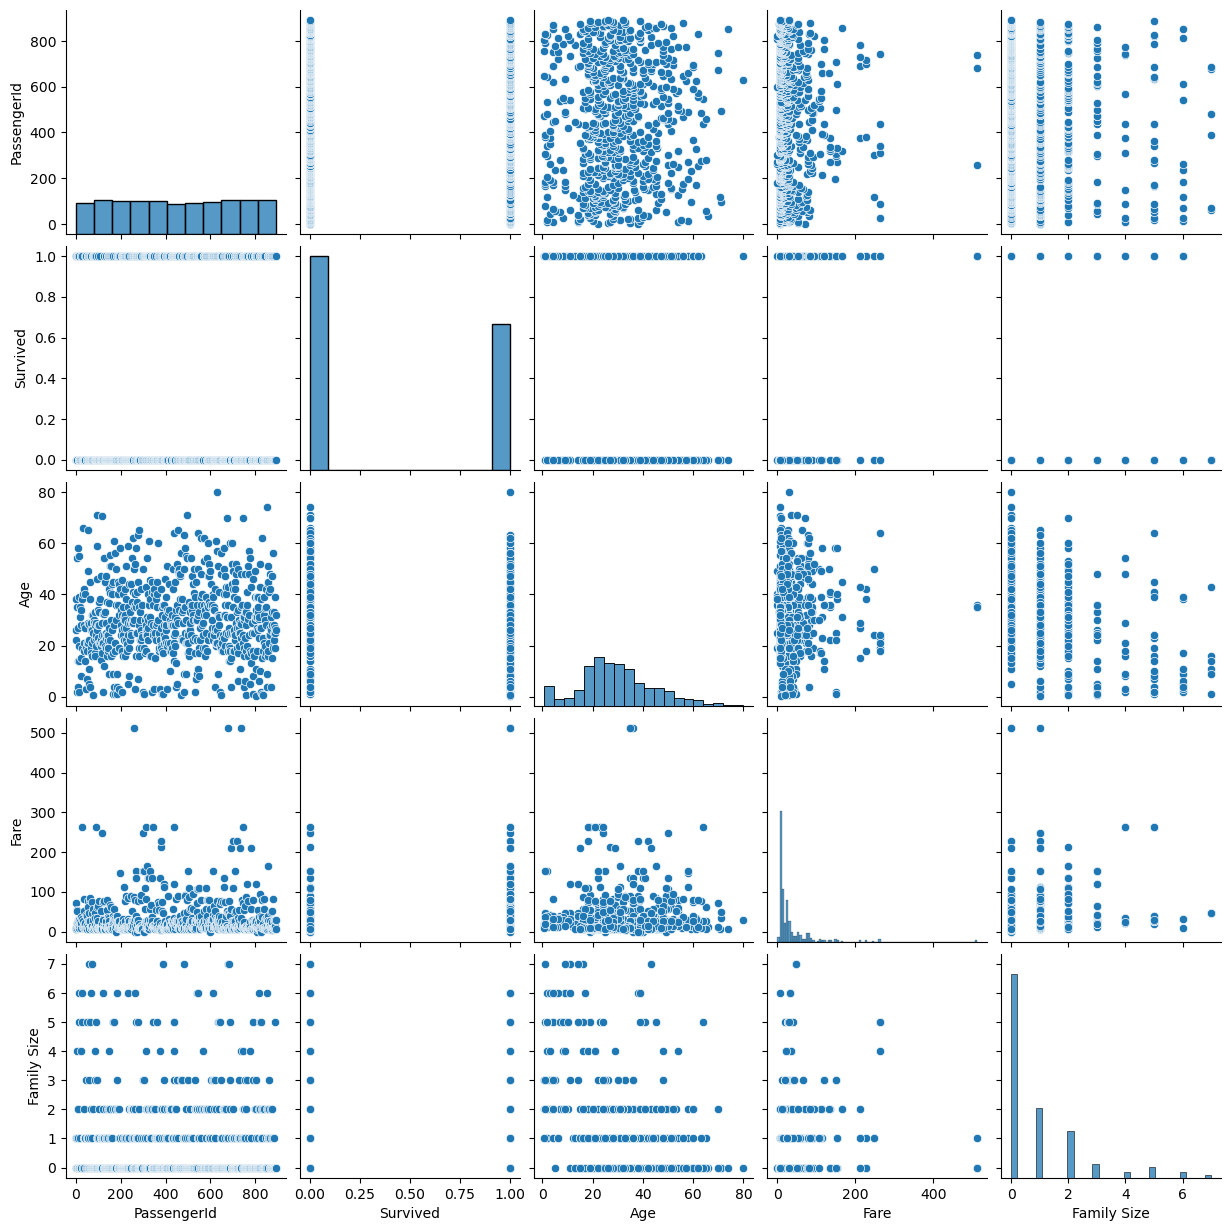

In [49]:
sns.pairplot(numeric1.dropna())

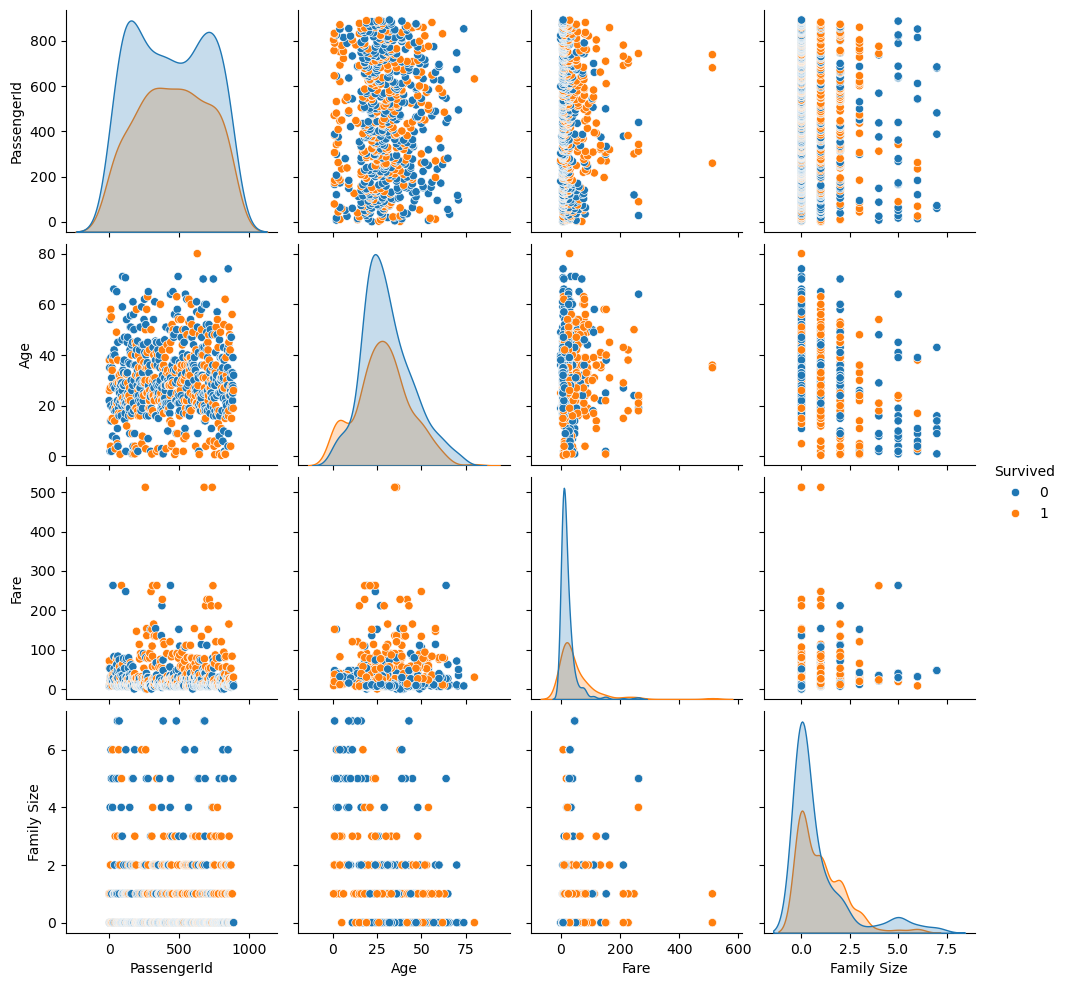

In [50]:
sns.pairplot(numeric1.dropna(),hue='Survived')

The pair plot provides us with two types of visualizations — a scatter plot, and a distplot. You can read more about the types of plots here.https://seaborn.pydata.org/generated/seaborn.distplot.html

The distplot on the diagonal gives us information about a single variable, similar to the histograms we created earlier.

The scatter plot shows us the correlation between all numeric variables. There seem to be no strong relationships observed from any of these variables.
## Heatmap

We can generate a heatmap in Seaborn, similar to the one provided in the Pandas profiling report.

Before generating the heatmap, we need to create a correlation matrix from our data frame:

In [52]:
cor = numeric.corr()
cor

,PassengerId,Survived,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.077221,-0.035322,0.081629,0.257307
Age,0.036847,-0.077221,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.096067,0.159651,0.216225,1.000000


<Axes: >

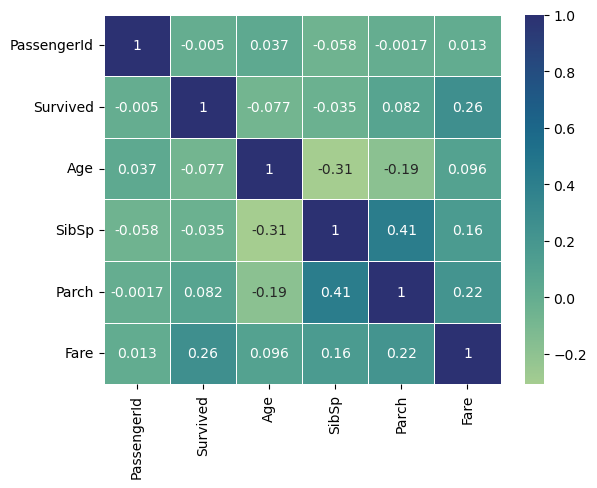

In [55]:
sns.heatmap(cor, annot=True, linewidths=0.5, cmap='crest')

The heatmap shows us the correlation between the variables in the data set. The variation in colors represents different levels of correlation.

The correlation between variables range from -1 to 1. A value of -1 represents a perfect negative correlation, and a value of 1 represents a perfect positive correlation.

A value of zero indicates that there is no correlation whatsoever between the variables.

You’ll notice that the diagonal in the heatmap seems to have a correlation of 1, and that is because every variable is perfectly correlated with itself.

We can observe some strong relationships here.

    The variables ‘SibSp’ and ‘Parch’ seem to have a positive correlation.
    The variables ‘Fare’ and ‘Survived’ also seem to have a positive correlation.

And… We’re Done!

Data visualization will be helpful to practice exploratory data analysis and visualization on a couple of different datasets, to understand what type of plot to use with different kinds of variables.

Data visualization is a great skill to have because you can help break down complex data and provide valuable insights based on your findings.

It not only helps you understand the data but also allows you to present it clearly to another person.